In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [677]:
df = pd.read_csv('data/non_iid.csv')
print(df.head())

   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km) Weather Type  \
0               1010.82         2  Winter              3.5        Rainy   
1               1011.43         7  Spring             10.0       Cloudy   
2               1018.72         5  Spring              5.5        Sunny   
3               1026.25         7  Spring              1.0        Sunny   
4                990.67         1  Winter              2.5        Rainy   

    Location  
0    inland0  
1    inland1  
2  mountain0  
3   coastal0  
4  mountain1  


**Exploratory Data Analysis(EDA)**

In [678]:
# number of rows and columns
rows, cols = df.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  13200
Number of columns:  11


In [679]:
# types of columns
pd.set_option('display.max_columns', None)
print(df.dtypes)

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Weather Type             object
Location                 object
dtype: object


In [589]:
# The target data is catagorical and it is nicely balanced
print(df['Weather Type'].value_counts())

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Weather Type ')

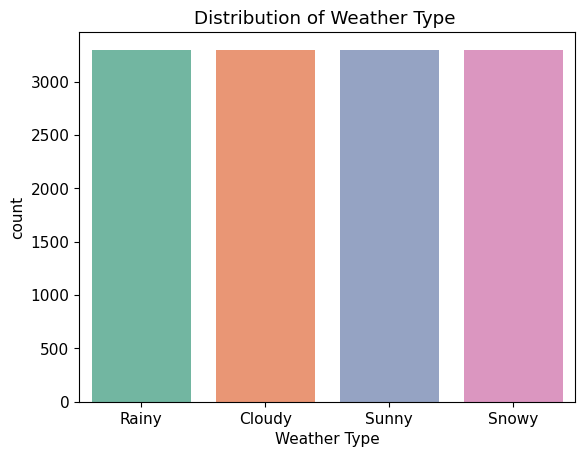

In [680]:
#target column
sns.countplot(x=df['Weather Type'], palette="Set2") 
plt.title('Distribution of Weather Type ')

In [681]:
# describe continuous data
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [682]:
# describe catagorical data
df.describe(include='object')

,Cloud Cover,Season,Weather Type,Location
count,13200,13200,13200,13200
unique,4,4,4,9
top,overcast,Winter,Rainy,inland0
freq,6090,5610,3300,1606


In [683]:
#numerical_columns & categorical_columns 
cat = df.select_dtypes(include=object).columns.tolist()
num = df.select_dtypes(exclude=object).columns.tolist()
print(' categorical_columns: \n' ,cat)
print('\n numerical_columns: \n' , num)

 categorical_columns: 
 ['Cloud Cover', 'Season', 'Weather Type', 'Location']

 numerical_columns: 
 ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']


In [684]:
# check for missing values
# no missing values
print(df.isnull().sum())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Weather Type            0
Location                0
dtype: int64


In [685]:
# check repeated rows
df.duplicated().sum()

0

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Weather Type               4
Location                   9
dtype: int64


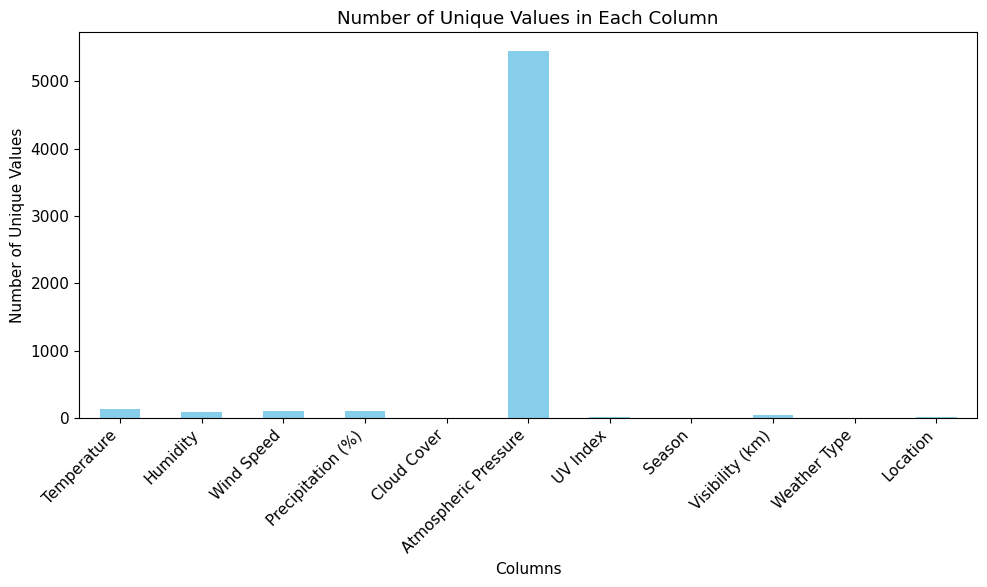

In [686]:
# check the number of unique values in each column and remove unnecessary columns
print(df.nunique())
unique_counts = df.nunique()
# Plotting the unique value counts
plt.figure(figsize=(10, 6))
unique_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("figures/Unigue_values.png", dpi=300, bbox_inches="tight")
plt.show()

In [451]:
# # drop the atomospheric pressure column, 
# # too many unique values, not useful
# df.drop(['Atmospheric Pressure'], axis=1, inplace=True)

In [723]:
cat_cols = ['Cloud Cover', 'Season', 'Location']

for col in cat_cols:
    counts = df[col].value_counts()
    print(counts)
    print("\n")


Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64


Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64


Location
inland0      1606
inland1      1605
mountain0    1605
inland2      1605
mountain1    1604
mountain2    1604
coastal0     1191
coastal1     1190
coastal2     1190
Name: count, dtype: int64




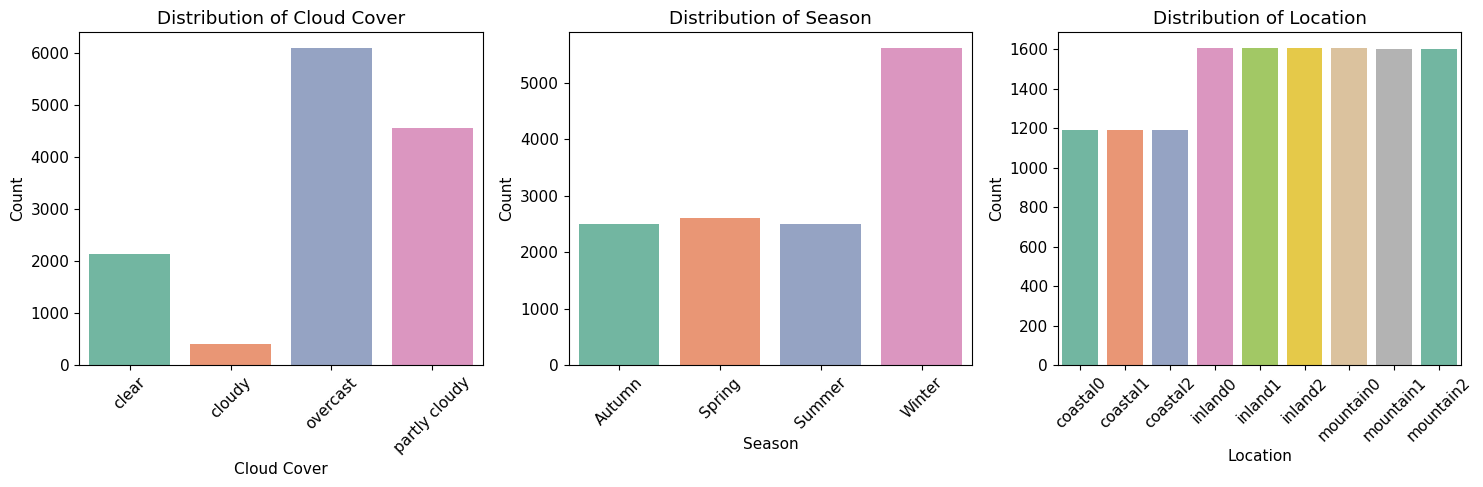

In [724]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df and cat_cols are already defined
plt.figure(figsize=(15, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    # Extract unique categories and sort them by the first letter only
    sorted_categories = sorted(df[col].unique(), key=lambda x: x[0])
    sns.countplot(x=df[col], order=sorted_categories, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate labels for better visibility

plt.tight_layout()
plt.savefig("figures/Distribution_of_categoricals.png", dpi=300, bbox_inches="tight")
plt.show()


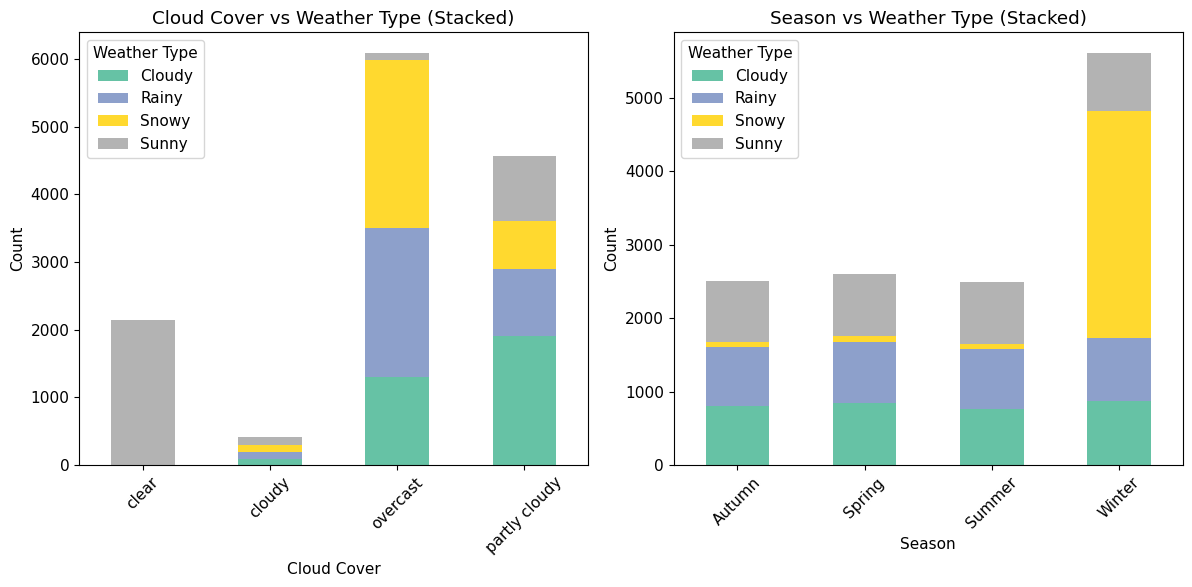

In [695]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df, cat_cols, and target_col are predefined
cat_cols = ['Cloud Cover', 'Season']
target_col = 'Weather Type'

plt.figure(figsize=(18, 6)) 

for i, col in enumerate(cat_cols, 1):
    # Create a crosstab for the categorical variable and the target
    crosstab = pd.crosstab(df[col], df[target_col])

    # Create a stacked bar plot
    ax = plt.subplot(1, 3, i)
    crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')
    plt.title(f"{col} vs {target_col} (Stacked)")
    plt.xlabel(col)
    plt.ylabel('Count')

    # Rotate X-axis labels to 45 degrees for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.savefig("figures/Categoricals_vs_target.png", dpi=300, bbox_inches="tight")
plt.show()


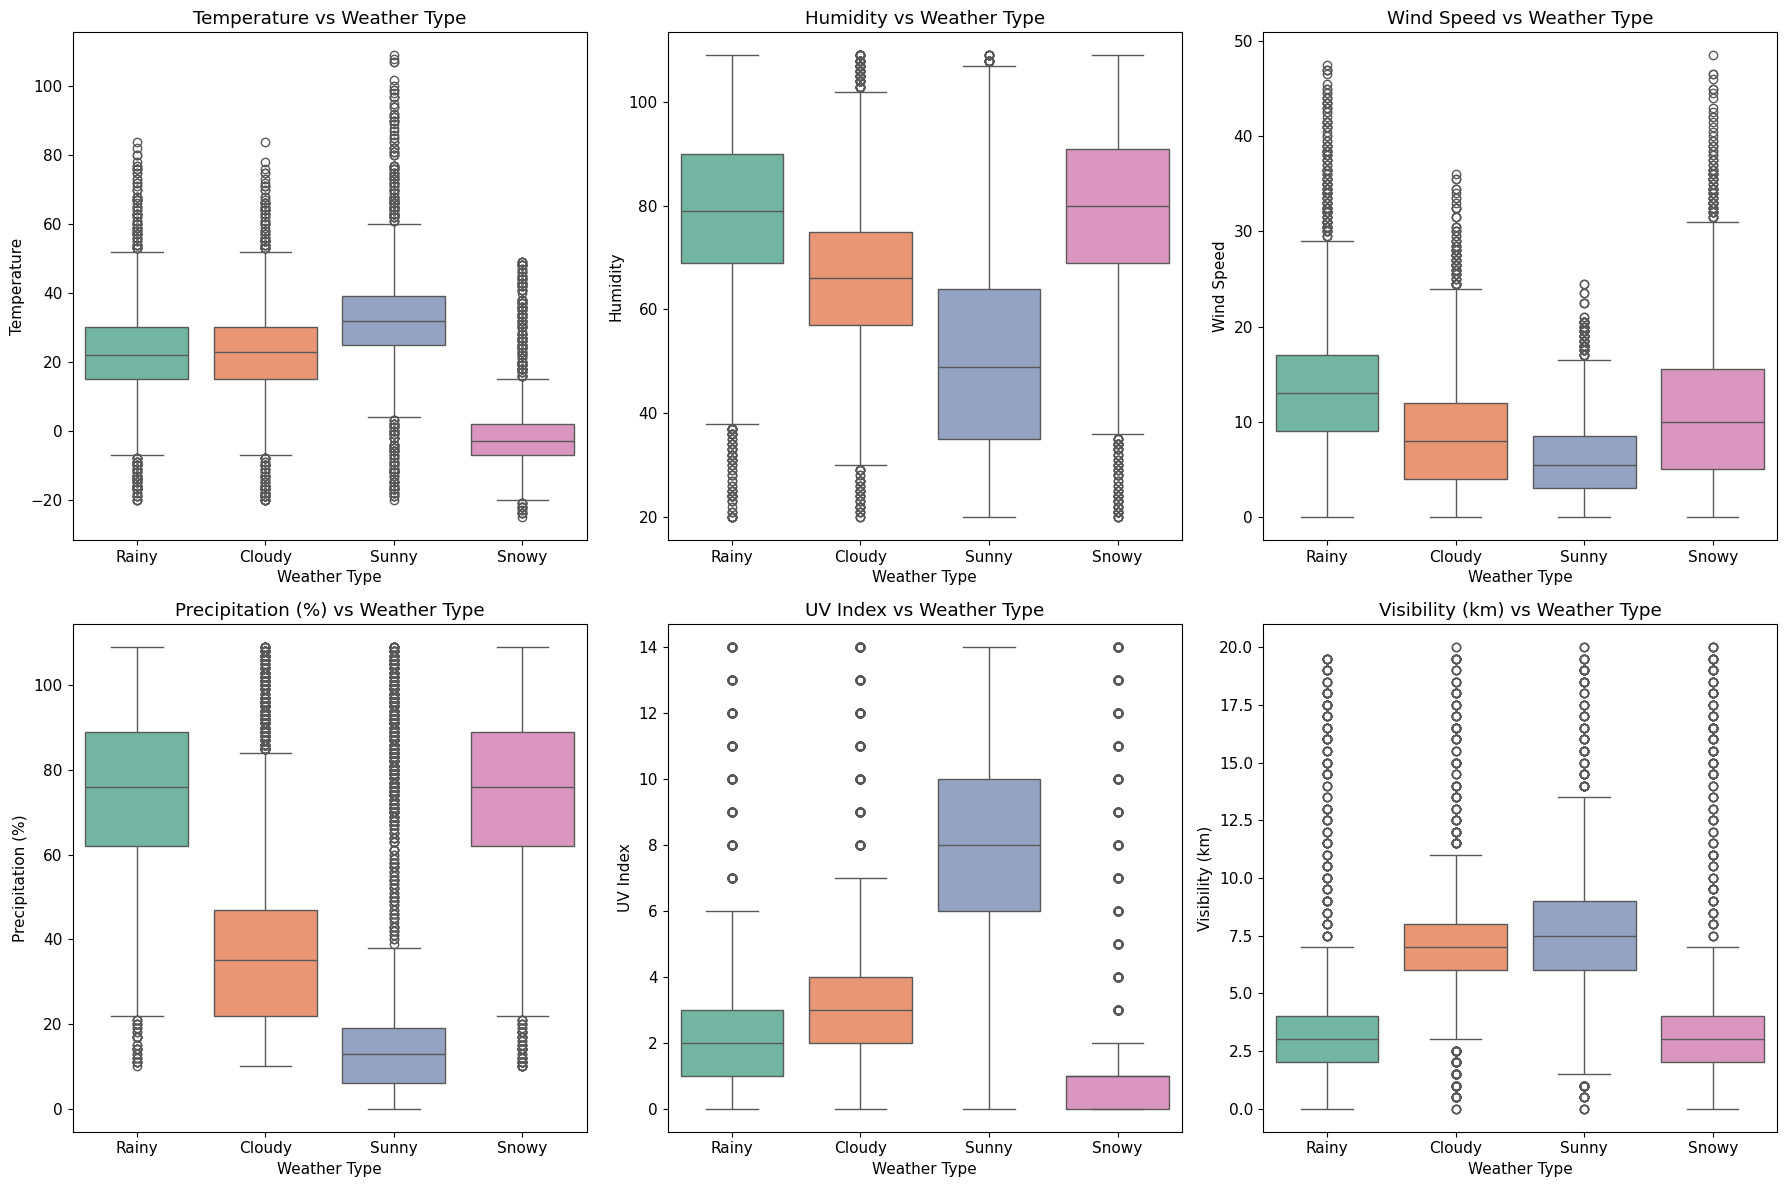

In [609]:
# create 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',  'UV Index', 
# 'Visibility (km)'s relation with weather tpye
#  each data is kind of important to predict the weather type
num_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'UV Index', 'Visibility (km)']
target_col = 'Weather Type'

plt.figure(figsize=(18, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=target_col, y=col, data=df, palette='Set2') # Create a box plot for each numerical column
    plt.title(f"{col} vs {target_col}")
    plt.xlabel('Weather Type')
    plt.ylabel(col)

plt.tight_layout()
plt.savefig("figures/Countinous_vs_target.png", dpi=300, bbox_inches="tight")
plt.show()


**Splitting**

In [ ]:
# # split the data using stratified split. 
# # No stratified group split since every data is independent
# from sklearn.model_selection import GroupKFold, GroupShuffleSplit
# def group_shuffle_split(X, y, train_size, val_size, test_size, random_state=None):
#     # Test if the sum of train_size, val_size, and test_size is equal to 1
#     #if train_size + val_size + test_size != 1:
#     #for more accurate:
#     if not np.isclose(train_size + val_size + test_size, 1):
#         raise ValueError("The sum of train_size, val_size, and test_size must be equal to 1.")
    
#     # Test if random_state is an integer
#     if random_state is not None and not isinstance(random_state, int):
#         raise ValueError("random_state must be an integer.")
    
#     # Create the GroupShuffleSplit object for the training and other sets
#     sss = GroupShuffleSplit(n_splits=1, train_size=train_size, test_size=val_size+test_size, random_state=random_state)
#     # Split the dataset into training and other sets
#     train_index, temp_index = next(sss.split(X, y))
#     X_train, X_temp = X.iloc[train_index], X.iloc[temp_index]
#     y_train, y_temp = y.iloc[train_index], y.iloc[temp_index]

#     # Split the remaining dataset into validation and test sets
#     test_ratial = test_size / (val_size + test_size)
#     sss_val_test = GroupShuffleSplit(n_splits=1, test_size=test_ratial, random_state=random_state)
#     val_index, test_index = next(sss_val_test.split(X_temp, y_temp))
#     X_val, X_test = X_temp.iloc[val_index], X_temp.iloc[test_index]
#     y_val, y_test = y_temp.iloc[val_index], y_temp.iloc[test_index]

#     # Check output sizes based on actual sample counts
#     expected_train_size = int(np.floor(train_size * len(X)))
#     expected_val_size = int(np.floor(val_size * len(X)))
#     expected_test_size = len(X) - expected_train_size - expected_val_size

#         # Print actual sizes
#     print(f"Training set actual size: {X_train.shape[0]}")
#     print(f"Validation set actual size: {X_val.shape[0]}")
#     print(f"Test set actual size: {X_test.shape[0]}")

#     # Size check for expected output sizes
#     if X_train.shape[0] != expected_train_size:
#         raise ValueError(f"Expected training set size {expected_train_size}, but got {X_train.shape[0]}.")
#     if X_val.shape[0] != expected_val_size:
#         raise ValueError(f"Expected validation set size {expected_val_size}, but got {X_val.shape[0]}.")
#     if X_test.shape[0] != expected_test_size:
#         raise ValueError(f"Expected test set size {expected_test_size}, but got {X_test.shape[0]}.")

#     return X_train, y_train, X_val, y_val, X_test, y_test

In [617]:
import numpy as np
from sklearn.model_selection import GroupShuffleSplit

def group_shuffle_split(X, y, groups, train_size, val_size, test_size, random_state=None):
    # Check if the sum of train_size, val_size, and test_size equals 1
    if not np.isclose(train_size + val_size + test_size, 1):
        raise ValueError("The sum of train_size, val_size, and test_size must equal 1.")
    
    # Validate that random_state is an integer
    if random_state is not None and not isinstance(random_state, int):
        raise ValueError("random_state must be an integer.")
    
    # Create a GroupShuffleSplit object for splitting into training/validation and test sets
    sss = GroupShuffleSplit(n_splits=1, train_size=train_size + val_size, test_size=test_size, random_state=random_state)
    # Split the dataset into training/validation and test sets using ID as group information
    train_val_index, test_index = next(sss.split(X, y, groups=groups))
    X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]
    y_train_val, y_test = y.iloc[train_val_index], y.iloc[test_index]

    # Further split the training/validation set into training and validation sets
    val_ratio = val_size / (train_size + val_size)
    sss_train_val = GroupShuffleSplit(n_splits=1, train_size=1 - val_ratio, test_size=val_ratio, random_state=random_state)
    train_index, val_index = next(sss_train_val.split(X_train_val, y_train_val, groups=groups[train_val_index]))  # Use appropriate ID

    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    print(f"Training set actual size: {X_train.shape[0]}")
    print(f"Validation set actual size: {X_val.shape[0]}")
    print(f"Test set actual size: {X_test.shape[0]}")

    return X_train, y_train, X_val, y_val, X_test, y_test

# Example usage
# Assuming X, y, and groups are already defined, where groups is based on ID column
# X_train, y_train, X_val, y_val, X_test, y_test = group_shuffle_split(X, y, groups, 0.6, 0.2, 0.2, random_state=42)


In [618]:
X = df.drop(columns='Weather Type')
y = df['Weather Type']
groups = df['Location']
# Let the tarining set be 0.6, validation set be 0.2, and test set be 0.2
X_train, y_train, X_val, y_val, X_test, y_test = group_shuffle_split(X, y, \
                                                    groups, train_size=0.6, val_size=0.2, \
                                                    test_size=0.2, random_state=42)

print("X_train head:\n", X_train.head())
print("X_val head:\n", X_val.head())
print("X_test head:\n", X_test.head())


Training set actual size: 8025
Validation set actual size: 2381
Test set actual size: 2794
X_train head:
    Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
5         32.0        55         3.5               26.0       overcast   
6         -2.0        97         8.0               86.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)   Location  
0               1010.82         2  Winter              3.5    inland0  
1               1011.43         7  Spring             10.0    inland1  
2               1018.72         5  Spring              5.5  mountain0  
5               1010.03         2  Summer              5.0    inland2  
6                990.87         1  Winter              4.0    inland0  
X_val head:
     

**Preprocessing**

In [619]:
print(df.columns)

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Weather Type', 'Location'],
      dtype='object')


In [620]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# X_train = X_train.drop(columns=['Location'])
# X_val = X_val.drop(columns=['Location'])
# X_test = X_test.drop(columns=['Location'])
# Identify the types of columns excluding the 'object' type and 'ID' column
continuous_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
#categorical_cols = ['Location']  # Include only 'Location'
ordinal_cols = ['Season', 'Cloud Cover']  # Include 'Season' and 'Cloud Cover' columns
ordinal_categories = [
    ['Spring', 'Summer', 'Autumn', 'Winter'],  # Season order
    ['clear', 'partly cloudy', 'cloudy', 'overcast']  # Cloud Cover order
]

# Define a preprocessing pipeline for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),  # Standardize continuous columns
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),  # Ordinal encode the 'Season' column
        # ('cat', OneHotEncoder(sparse_output=False), categorical_cols),  # One-hot encode categorical columns
    ])

# Transform the training set
X_train_preprocessed = preprocessor.fit_transform(X_train)
# Transform the validation and test sets using the same transformations learned from the training set
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

# Getting feature names from OneHotEncoder for categorical columns
# cat_encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine continuous column names and one-hot encoded categorical column names
all_columns = continuous_cols + ordinal_cols

# Convert the transformed arrays back to DataFrames for viewing
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_columns)
X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=all_columns)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_columns)

# Show the head of each preprocessed dataset
print("X_train_preprocessed head:\n", X_train_preprocessed_df.head())
print("X_val_preprocessed head:\n", X_val_preprocessed_df.head())
print("X_test_preprocessed head:\n", X_test_preprocessed_df.head())
print("X_train_preprocessed shape:", X_train_preprocessed_df.shape)


X_train_preprocessed head:
    Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0    -0.153579  0.148627   -0.066931           0.830521              0.182780   
1     1.253354  1.301796   -0.207666           0.480679              0.199971   
2     0.746858 -0.302614   -0.418770          -1.268530              0.405423   
3     0.859413 -0.753854   -0.911344          -0.950492              0.160516   
4    -1.054017  1.351934   -0.278034           0.957736             -0.379464   

   UV Index  Visibility (km)  Season  Cloud Cover  
0 -0.455653        -0.518066     3.0          1.0  
1  0.842123         1.440877     0.0          1.0  
2  0.323013         0.084686     0.0          0.0  
3 -0.455653        -0.066002     1.0          3.0  
4 -0.715208        -0.367378     3.0          3.0  
X_val_preprocessed head:
    Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0     1.197077  0.650005   -1.192815           0.830521           

In [541]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
# from sklearn.compose import ColumnTransformer # include transformers in a pipeline

# continuous_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()  # Exclude 'object' type columns
# categorical_cols = ['Location']  # Include only 'Location' 
# ordinal_cols = ['Season', 'Cloud Cover']  # Include 'Season' and 'Cloud Cover' columns
# ordinal_categories = [
#     ['Spring', 'Summer', 'Autumn', 'Winter'],  # Season order
#     ['clear', 'partly cloudy', 'cloudy', 'overcast']  # Cloud Cover order
# ]

# # Define a preprocessing pipeline for numerical and categorical columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), continuous_cols),  # Standardize continous columns
#         ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),  # Ordinal encode the 'Season' column
#         ('cat', OneHotEncoder(sparse_output=False), categorical_cols),  # One-hot encode categorical columns
#     ])
# # Transform the training set
# X_train_preprocessed = preprocessor.fit_transform(X_train)
# # Transform the validation and test sets using the same transformations learned from the training set
# X_val_preprocessed = preprocessor.transform(X_val)
# X_test_preprocessed = preprocessor.transform(X_test)
# # Convert the transformed data back to a DataFrame to inspect it
# # Getting feature names from OneHotEncoder for categorical columns
# cat_encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# # Combine continuous column names and one-hot encoded categorical column names
# all_columns = continuous_cols + ordinal_cols + cat_encoded_cols.tolist()

# # Convert the transformed arrays back to DataFrames for viewing
# X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_columns)
# X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=all_columns)
# X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_columns)

# # Show the head of each preprocessed dataset
# print("X_train_preprocessed head:\n", X_train_preprocessed_df.head())
# print("X_val_preprocessed head:\n", X_val_preprocessed_df.head())
# print("X_test_preprocessed head:\n", X_test_preprocessed_df.head())
# print("X_train_preprocessed shape:", X_train_preprocessed_df.shape)


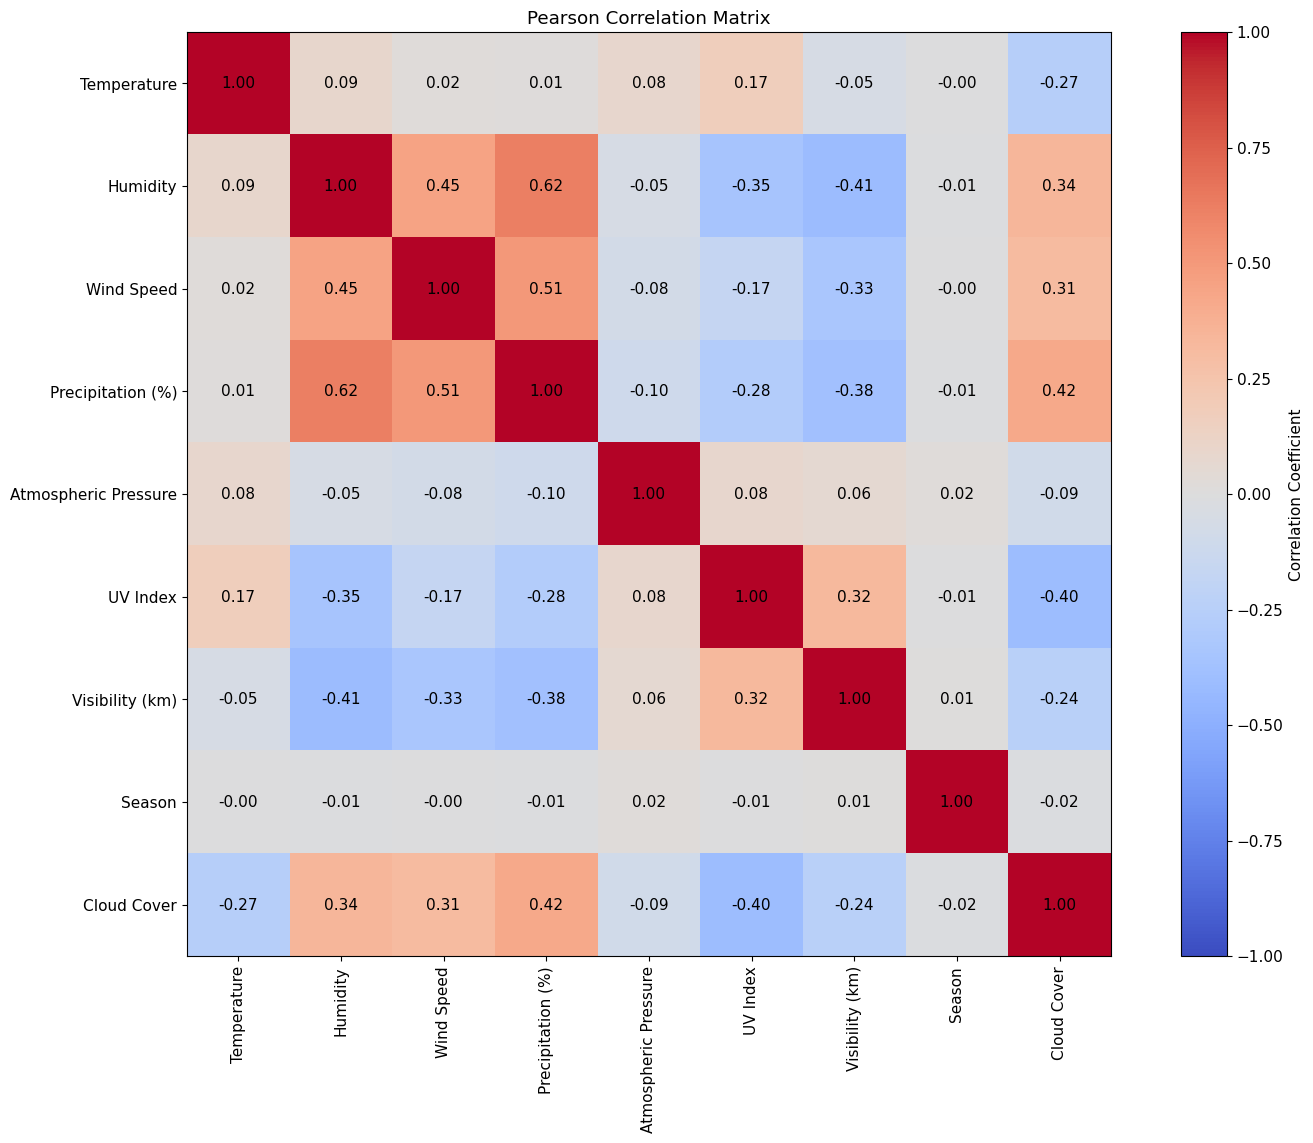

In [621]:
# calculate the correlation matrix
correlation_matrix = X_val_preprocessed_df.corr()
# plot the correlation matrix
plt.figure(figsize=(18,12))
# set color scale
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.title('Pearson Correlation Matrix')
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)#rotation=90
plt.yticks(ticks=np.arange(len(correlation_matrix.index)), labels=correlation_matrix.index)
# Annotate the heatmap with correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.show()

From Correlation Matrix, there's no need to remove any

In [622]:
# Revert label encoding for the target variable
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the training target (y_train) and transform it
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the validation and test targets using the same encoder
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Display the encoded target values
print("Encoded y_train:", y_train_encoded)
print("Encoded y_val:", y_val_encoded)
print("Encoded y_test:", y_test_encoded)

# To decode back to the original labels if needed:
# original_labels = label_encoder.inverse_transform(y_train_encoded)

Encoded y_train: [1 0 3 ... 1 2 1]
Encoded y_val: [3 3 0 ... 0 2 0]
Encoded y_test: [1 3 0 ... 3 3 0]


In [623]:
# Look up the mapping of labels to numbers
print("Mapping of labels to numbers:", dict(enumerate(label_encoder.classes_)))

Mapping of labels to numbers: {0: 'Cloudy', 1: 'Rainy', 2: 'Snowy', 3: 'Sunny'}


In [462]:
# # Decode the encoded target values if needed
# y_decoded = label_encoder.inverse_transform(y_encoded)
# print("Decoded target variable:", y_decoded)

**Preprocessing functions**

In [624]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
df = pd.read_csv('data/non_iid.csv')
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']
groups = X['Location'] 
X = X.drop('Location', axis=1)
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Function for stratified shuffle split (other and test only)
def group_shuffle_split(X, y, groups, train_size, test_size, random_state=None):
    # Test if train_size + test_size is equal to 1
    if not np.isclose(train_size + test_size, 1):
        raise ValueError("The sum of train_size and test_size must be equal to 1.")
    
    # Test if random_state is an integer
    if random_state is not None and not isinstance(random_state, int):
        raise ValueError("random_state must be an integer.")
    
    splitter = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    train_idx, test_idx = next(splitter.split(X, y, groups=groups))
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # # Print sizes
    # print(f"Training set size: {X_train.shape[0]}")
    # print(f"Test set size: {X_test.shape[0]}")
    
    return X_train, y_train, X_test, y_test

# Example usage of stratified shuffle split
X_train, y_train, X_test, y_test = group_shuffle_split(X, y, groups, train_size=0.8, test_size=0.2, random_state=42)

# Preprocessing function
def preprocess_data(X_train, X_test, y_train, y_test):
    # Define column categories
    continuous_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
    ordinal_cols = ['Season', 'Cloud Cover']
    ordinal_categories = [
    ['Spring', 'Summer', 'Autumn', 'Winter'],  # Season order
    ['clear', 'partly cloudy', 'cloudy', 'overcast']  # Cloud Cover order
    ]
    # Define a preprocessing pipeline for numerical and categorical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), continuous_cols),  # Standardize continuous columns
            ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),  # Ordinal encode ordinal columns
        ]
    )
    
    # Apply transformations to the train and test sets
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)
    
    # Get feature names
    all_columns = continuous_cols + ordinal_cols
    
    # Convert transformed arrays back to DataFrames
    X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_columns)
    X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_columns)

    # Fit the encoder on the training target (y_train) and transform it
    y_train_encoded = label_encoder.fit_transform(y_train)

    # Transform test targets using the same encoder
    y_test_encoded = label_encoder.transform(y_test)
    
    return X_train_preprocessed_df, X_test_preprocessed_df, y_train_encoded, y_test_encoded
# y_train_encoded, y_test_encoded

# Apply preprocessing
X_train_preprocessed_df, X_test_preprocessed_df, y_train_encoded, y_test_encoded = preprocess_data(X_train, X_test, y_train, y_test)
# y_train_encoded, y_test_encoded
# Show the head of preprocessed data
print("X_train_preprocessed head:\n", X_train_preprocessed_df.head())
print("X_test_preprocessed head:\n", X_test_preprocessed_df.head())
print("X_train_preprocessed shape:", X_train_preprocessed_df.shape)
print("X_test_preprocessed shape:", X_test_preprocessed_df.shape)

X_train_preprocessed head:
    Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0    -0.274904  0.199914   -0.053741           0.876289              0.135812   
1     1.156079  1.344117   -0.197335           0.530738              0.152475   
2     0.640925 -0.247817   -0.412727          -1.197020              0.351615   
3     1.098840  0.697394   -1.202495           0.876289              0.557311   
4     0.755404 -0.695549   -0.915307          -0.882882              0.114232   

   UV Index  Visibility (km)  Season  Cloud Cover  
0 -0.509533        -0.568955     3.0          1.0  
1  0.785203         1.364162     0.0          1.0  
2  0.267308         0.025851     0.0          0.0  
3  0.785203        -1.312461     0.0          0.0  
4 -0.509533        -0.122851     1.0          3.0  
X_test_preprocessed head:
    Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0     0.469207  0.249662    1.023216           0.373669          

In [583]:
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd
# import numpy as np
# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # Function for stratified shuffle split (other and test only)
# def stratified_shuffle_split(X, y, train_size, test_size, random_state=None):
#     # Test if train_size + test_size is equal to 1
#     if not np.isclose(train_size + test_size, 1):
#         raise ValueError("The sum of train_size and test_size must be equal to 1.")
    
#     # Test if random_state is an integer
#     if random_state is not None and not isinstance(random_state, int):
#         raise ValueError("random_state must be an integer.")
    
#     # Create the StratifiedShuffleSplit object
#     sss = StratifiedShuffleSplit(n_splits=1, train_size=train_size, test_size=test_size, random_state=random_state)
    
#     # Split the dataset into training and test sets
#     train_index, test_index = next(sss.split(X, y))
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
#     # # Print sizes
#     # print(f"Training set size: {X_train.shape[0]}")
#     # print(f"Test set size: {X_test.shape[0]}")
    
#     return X_train, y_train, X_test, y_test


# # Example usage of stratified shuffle split
# X_train, y_train, X_test, y_test = stratified_shuffle_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# # Preprocessing function
# def preprocess_data(X_train, X_test, y_train, y_test):
#     # Define column categories
#     continuous_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
#     categorical_cols = ['Location']
#     ordinal_cols = ['Season', 'Cloud Cover']
#     ordinal_categories = [
#     ['Spring', 'Summer', 'Autumn', 'Winter'],  # Season order
#     ['clear', 'partly cloudy', 'cloudy', 'overcast']  # Cloud Cover order
#     ]
#     # Define a preprocessing pipeline for numerical and categorical columns
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('num', StandardScaler(), continuous_cols),  # Standardize continuous columns
#             ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),  # Ordinal encode ordinal columns
#             ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
#         ]
#     )
    
#     # Apply transformations to the train and test sets
#     X_train_preprocessed = preprocessor.fit_transform(X_train)
#     X_test_preprocessed = preprocessor.transform(X_test)
    
#     # Get feature names
#     cat_encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
#     all_columns = continuous_cols + ordinal_cols + cat_encoded_cols.tolist()
    
#     # Convert transformed arrays back to DataFrames
#     X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_columns)
#     X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_columns)

#     # Fit the encoder on the training target (y_train) and transform it
#     y_train_encoded = label_encoder.fit_transform(y_train)

#     # Transform test targets using the same encoder
#     y_test_encoded = label_encoder.transform(y_test)
    
#     return X_train_preprocessed_df, X_test_preprocessed_df, y_train_encoded, y_test_encoded
# # y_train_encoded, y_test_encoded

# # Apply preprocessing
# X_train_preprocessed_df, X_test_preprocessed_df, y_train_encoded, y_test_encoded = preprocess_data(X_train, X_test, y_train, y_test)
# # y_train_encoded, y_test_encoded
# # Show the head of preprocessed data
# print("X_train_preprocessed head:\n", X_train_preprocessed_df.head())
# print("X_test_preprocessed head:\n", X_test_preprocessed_df.head())
# print("X_train_preprocessed shape:", X_train_preprocessed_df.shape)
# print("X_test_preprocessed shape:", X_test_preprocessed_df.shape)

**Cross Validation**

In [629]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

def MLpipe_KFold_Classification(X, y, groups, models_with_params, random_states=5):
    """
    Classification pipeline using KFold and cross-validation.
    Combines all test sets across random states into a single set, predicts with the best model,
    and generates an overall confusion matrix.

    Args:
        X: Features matrix.
        y: Target variable.
        models_with_params: Dictionary of models and their parameter grids.
        random_states: Number of random states for repeated splits.

    Returns:
        test_scores: List of dictionaries with test scores for each model.
        best_models: List of best models from GridSearchCV for each random state.
    """
    test_scores = []
    best_models = []
    
    # Data to store combined test sets
    combined_X_test_preprocessed = []
    combined_y_test_true = []
    combined_y_test_pred = []

    for model_name, model_info in models_with_params.items():
        print(f"Model Name: {model_name}...")
        for random_state in range(random_states):
            print(f"\nRandom State {random_state}")
        
            # Split the data
            X_other, y_other, X_test, y_test = group_shuffle_split(X, y, groups, train_size=0.8, test_size=0.2, random_state=random_state)
        
            # Preprocess the data
            X_other_preprocessed, X_test_preprocessed, y_other_encoded, y_test_encoded = preprocess_data(X_other, X_test, y_other, y_test)

            # Store preprocessed test data for combination
            combined_X_test_preprocessed.append(X_test_preprocessed)
            combined_y_test_true.extend(y_test_encoded)
            
            # Define StratifiedKFold for cross-validation
            gkf = GroupKFold(n_splits=4)
            
            # Create GridSearchCV
            grid = GridSearchCV(
                estimator=model_info["model"],
                param_grid=model_info["params"],
                scoring="accuracy",  # Adjust metric if needed
                cv=gkf,
                n_jobs=-1,
                verbose=True
            )
            
            # Fit the model
            grid.fit(X_other_preprocessed, y_other_encoded, groups=groups.iloc[X_other.index])

            # Get the best model and test score
            best_model = grid.best_estimator_
            best_models.append((best_model))

            y_test_pred = best_model.predict(X_test_preprocessed)
            combined_y_test_pred.extend(y_test_pred)
            
            test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
            test_scores.append(test_accuracy)

            print(f"Best Parameters: {grid.best_params_}")
            print(f"Test Accuracy: {test_accuracy}")
            print(f"Cross-Validation Accuracy (GridSearchCV best score): {grid.best_score_}")
        
        # Combine all test sets and predictions
        print(f"\nGenerating combined confusion matrix for {model_name}...")
        
        # Stack all preprocessed test data
        combined_X_test_preprocessed = np.vstack(combined_X_test_preprocessed)

        # Decode test labels and predictions
        decoded_y_test_true = label_encoder.inverse_transform(combined_y_test_true)
        decoded_y_test_pred = label_encoder.inverse_transform(combined_y_test_pred)
        # Compute and plot confusion matrix
        cm = confusion_matrix(decoded_y_test_true, decoded_y_test_pred, normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
        disp.plot(cmap="Blues", values_format=".2f")
        plt.title(f"Overall Confusion Matrix for {model_name}")
        plt.savefig(f"figures/{model_name}_cm.png", dpi=300, bbox_inches="tight")
        plt.show()

        print(f"\nFinal Results: {model_name}")
        print(f"Mean Test Score: {np.mean(test_scores)}")
        print(f"Standard Deviation of Test Scores: {np.std(test_scores)}")

    return test_scores, best_models, combined_X_test_preprocessed, combined_y_test_true


In [465]:
# from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from sklearn.metrics import accuracy_score
# import pandas as pd
# import numpy as np

# def MLpipe_KFold_Classification(X, y, models_with_params, random_states=5):
#     """
#     Classification pipeline using KFold and cross-validation.
#     Combines all test sets across random states into a single set, predicts with the best model,
#     and generates an overall confusion matrix.

#     Args:
#         X: Features matrix.
#         y: Target variable.
#         models_with_params: Dictionary of models and their parameter grids.
#         random_states: Number of random states for repeated splits.

#     Returns:
#         test_scores: List of test scores for each random state.
#         best_models: List of best models from GridSearchCV for each random state.
#         best_X_test_preprocessed: Test set features corresponding to the best model.
#         best_y_test_encoded: Test set labels corresponding to the best model.
#     """
#     test_scores = []
#     best_models = []
#     best_X_test_preprocessed = None
#     best_y_test_encoded = None
#     highest_test_score = -np.inf  # Initialize the highest test score

#     for model_name, model_info in models_with_params.items():
#         print(f"Model Name: {model_name}...")
#         for random_state in range(random_states):
#             print(f"\nRandom State {random_state}")

#             # Split the data
#             X_other, y_other, X_test, y_test = stratified_shuffle_split(X, y, train_size=0.8, test_size=0.2, random_state=random_state)

#             # Preprocess the data
#             X_other_preprocessed, X_test_preprocessed, y_other_encoded, y_test_encoded = preprocess_data(X_other, X_test, y_other, y_test)

#             # Define StratifiedKFold for cross-validation
#             skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)

#             # Create GridSearchCV
#             grid = GridSearchCV(
#                 estimator=model_info["model"],
#                 param_grid=model_info["params"],
#                 scoring="accuracy",
#                 cv=skf,
#                 n_jobs=-1,
#                 verbose=True
#             )

#             # Fit the model
#             grid.fit(X_other_preprocessed, y_other_encoded)

#             # Get the best model and test score
#             best_model = grid.best_estimator_
#             y_test_pred = best_model.predict(X_test_preprocessed)
#             test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
#             test_scores.append(test_accuracy)
#             best_models.append(best_model)

#             # Update the highest test score and store corresponding test set and model
#             if test_accuracy > highest_test_score:
#                 highest_test_score = test_accuracy
#                 best_X_test_preprocessed = X_test_preprocessed
#                 best_y_test_encoded = y_test_encoded
#                 best_rf_model = best_model  # Save the best model for the highest score

#             print(f"Best Parameters: {grid.best_params_}")
#             print(f"Test Accuracy: {test_accuracy}")
#             print(f"Cross-Validation Accuracy (GridSearchCV best score): {grid.best_score_}")

#         # Generate confusion matrix for the best model and test set
#         print(f"\nGenerating confusion matrix for {model_name} with the best random state...")
#         cm = confusion_matrix(best_y_test_encoded, best_rf_model.predict(best_X_test_preprocessed), normalize='true')
#         disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
#         disp.plot(cmap="Blues", values_format=".2f")
#         plt.title(f"Confusion Matrix for Best {model_name}")
#         plt.show()

#         print(f"\nFinal Results: {model_name}")
#         print(f"Mean Test Score: {np.mean(test_scores)}")
#         print(f"Standard Deviation of Test Scores: {np.std(test_scores)}")

#     return test_scores, best_models, best_X_test_preprocessed


Model Name: Logistic Regression...

Random State 0
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 0.8639942734430923
Cross-Validation Accuracy (GridSearchCV best score): 0.8684969638769083

Random State 1
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
Test Accuracy: 0.8550465282748747
Cross-Validation Accuracy (GridSearchCV best score): 0.8708594620887152

Random State 2
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 0.8525939177101968
Cross-Validation Accuracy (GridSearchCV best score): 0.8747480724768661

Random State 3
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 0.8561717352415027
Cross-Validation Accuracy (GridSearchCV best score): 

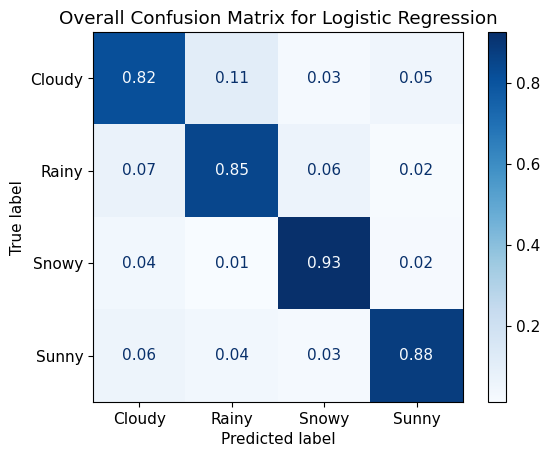


Final Results: Logistic Regression
Mean Test Score: 0.8649260808447135
Standard Deviation of Test Scores: 0.012236508639221391


In [630]:
# Example models and parameter grids
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

df = pd.read_csv('data/non_iid.csv')
X = df.drop(columns='Weather Type')
groups = X['Location']
X = X.drop('Location', axis=1)
y = df['Weather Type']

models_with_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=2000),
        "params": {
            "C": [0.01, 0.1, 1, 10, 100],
            "penalty": ["l2"],
            "solver": ["lbfgs", "sag", "newton-cg"]
        }
    }
}
# Call the function directly with X and y
test_scores_lr, best_models_lr, best_X_lr, best_y_lr = MLpipe_KFold_Classification(
    X, y, groups, models_with_params, random_states=10
)

Model Name: Random Forest...

Random State 0
Fitting 4 folds for each of 81 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 50}
Test Accuracy: 0.9162491052254832
Cross-Validation Accuracy (GridSearchCV best score): 0.917575049855661

Random State 1
Fitting 4 folds for each of 81 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.9098067287043665
Cross-Validation Accuracy (GridSearchCV best score): 0.9194318139471847

Random State 2
Fitting 4 folds for each of 81 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 50}
Test Accuracy: 0.9059033989266547
Cross-Validation Accuracy (GridSearchCV best score): 0.9197466008713105

Random State 3
Fitting 4 folds for each of 81 candidates, totalling 324 fits
Best Parameters: {'max_depth': N

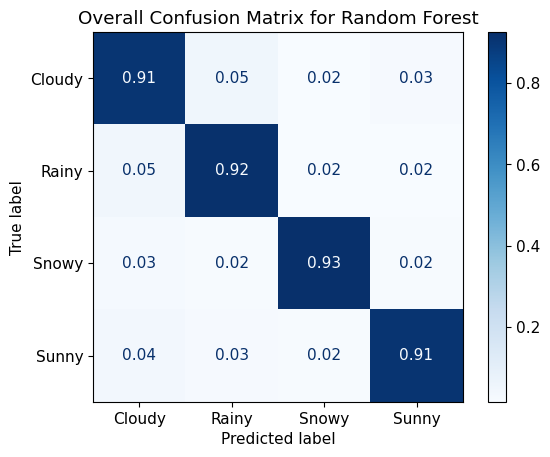


Final Results: Random Forest
Mean Test Score: 0.9145807734888798
Standard Deviation of Test Scores: 0.006460663084669074


In [632]:
models_with_params = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [5, 10, None],
            "max_features": ['sqrt', 'log2', None],
            "min_samples_split": [2, 5, 10]
        }
    }
}

# Call the function directly with X and y
test_scores_rf, best_models_rf, best_X_rf, best_y_rf = MLpipe_KFold_Classification(
    X, y, groups, models_with_params, random_states=10
)

Model Name: SVM...

Random State 0
Fitting 4 folds for each of 48 candidates, totalling 192 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.9062276306370795
Cross-Validation Accuracy (GridSearchCV best score): 0.9141424323715868

Random State 1
Fitting 4 folds for each of 48 candidates, totalling 192 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.9022906227630637
Cross-Validation Accuracy (GridSearchCV best score): 0.9146701195473519

Random State 2
Fitting 4 folds for each of 48 candidates, totalling 192 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.9026833631484794
Cross-Validation Accuracy (GridSearchCV best score): 0.9133721078552846

Random State 3
Fitting 4 folds for each of 48 candidates, totalling 192 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.9094812164579607
Cross-Validation Accuracy (GridSearchCV best score): 0.9127658210224231

Random State

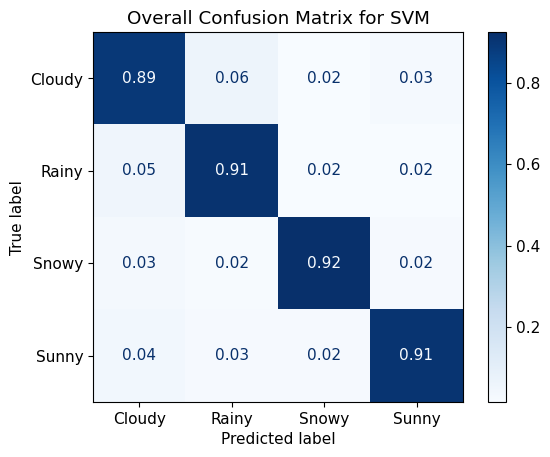


Final Results: SVM
Mean Test Score: 0.9090088753312093
Standard Deviation of Test Scores: 0.0073254958446165195


In [633]:
models_with_params = {
    "SVM": {
        "model": SVC(),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "gamma": [0.001, 0.01, 0.1, 1, 10, 100],
            "kernel": ["rbf", "sigmoid"]
        }
    }
}

# Call the function directly with X and y
test_scores_svm, best_models_svm, best_X_svm, best_y_svc= MLpipe_KFold_Classification(
    X, y, groups, models_with_params, random_states=10
)

Model Name: XGBoost...

Random State 0
Fitting 4 folds for each of 288 candidates, totalling 1152 fits
Best Parameters: {'eta': 0.1, 'max_depth': 6, 'n_estimators': 50, 'reg_lambda': 0.01}
Test Accuracy: 0.9112383679312813
Cross-Validation Accuracy (GridSearchCV best score): 0.9199517170672475

Random State 1
Fitting 4 folds for each of 288 candidates, totalling 1152 fits
Best Parameters: {'eta': 0.05, 'max_depth': 10, 'n_estimators': 200, 'reg_lambda': 100.0}
Test Accuracy: 0.9030064423765212
Cross-Validation Accuracy (GridSearchCV best score): 0.9203820962513851

Random State 2
Fitting 4 folds for each of 288 candidates, totalling 1152 fits
Best Parameters: {'eta': 0.05, 'max_depth': 6, 'n_estimators': 50, 'reg_lambda': 0.01}
Test Accuracy: 0.90912343470483
Cross-Validation Accuracy (GridSearchCV best score): 0.9189130137617609

Random State 3
Fitting 4 folds for each of 288 candidates, totalling 1152 fits
Best Parameters: {'eta': 0.1, 'max_depth': 6, 'n_estimators': 100, 'reg_lambda

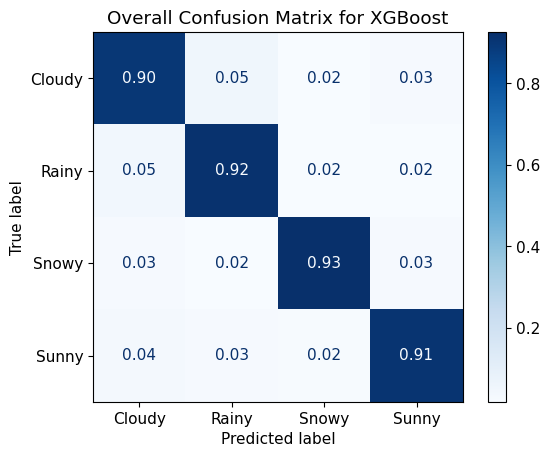


Final Results: XGBoost
Mean Test Score: 0.9125110730015452
Standard Deviation of Test Scores: 0.006261182286065101


In [643]:
models_with_params = {
    "XGBoost": {
        "model": XGBClassifier(eval_metric="logloss"),
        "params": {
            "eta": [0.01, 0.05, 0.1, 0.3],#learning rate
            "reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
            "max_depth": [5, 6, 10, None],
            "n_estimators": [50, 100, 200]#set at 1000, do not tune it.
        }
    }
}

# Call the function directly with X and y
test_scores_xgb, best_models_xgb, best_X_xgb, best_y_xgb = MLpipe_KFold_Classification(
    X, y, groups, models_with_params, random_states=10
)

Model Name: K-Nearest Neighbors (KNN)...

Random State 0
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Test Accuracy: 0.8947745168217609
Cross-Validation Accuracy (GridSearchCV best score): 0.9042003030490078

Random State 1
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Test Accuracy: 0.8926270579813886
Cross-Validation Accuracy (GridSearchCV best score): 0.9036227486011448

Random State 2
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Test Accuracy: 0.8901610017889088
Cross-Validation Accuracy (GridSearchCV best score): 0.9061314336674352

Random State 3
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Test Acc

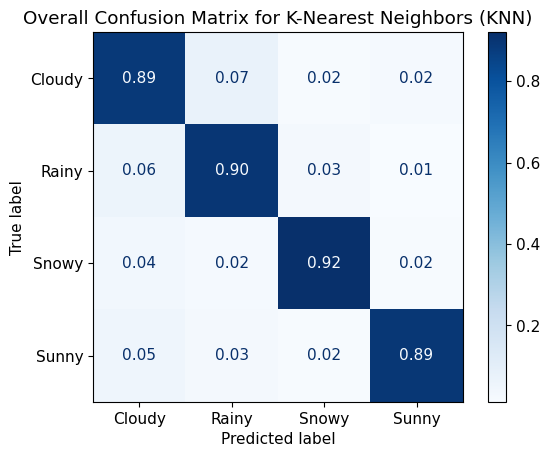


Final Results: K-Nearest Neighbors (KNN)
Mean Test Score: 0.8990385141568055
Standard Deviation of Test Scores: 0.008624518147039344


In [635]:
from sklearn.neighbors import KNeighborsClassifier
models_with_params = {
    "K-Nearest Neighbors (KNN)": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 10],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan", "minkowski"]  # Different distance metrics
        }
    }
}

# Call the function directly with X and y
test_scores_knn, best_models_knn, best_X_knn, best_y_knn = MLpipe_KFold_Classification(
    X, y, groups, models_with_params, random_states=10
)

In [644]:
print(f"Logistic Regression - Mean Test Accuracy: {np.\
    mean(test_scores_lr):.4f},Std:{np.std(test_scores_lr):.4f}")
print(f"Random Forest - Mean Test Accuracy: {np.\
    mean(test_scores_rf):.4f}, Std:{np.std(test_scores_rf):.4f}")
print(f"SVM - Mean Test Accuracy: {np.\
    mean(test_scores_svm):.4f}, Std: {np.std(test_scores_svm):.4f}")
print(f"XGBoost - Mean Test Accuracy: {np.\
    mean(test_scores_xgb):.4f}, Std: {np.std(test_scores_xgb):.4f}")
print(f"KNN - Mean Test Accuracy: {np.\
    mean(test_scores_knn):.4f}, Std: {np.std(test_scores_knn):.4f}")

Logistic Regression - Mean Test Accuracy: 0.8649,Std:0.0122
Random Forest - Mean Test Accuracy: 0.9146, Std:0.0065
SVM - Mean Test Accuracy: 0.9090, Std: 0.0073
XGBoost - Mean Test Accuracy: 0.9125, Std: 0.0063
KNN - Mean Test Accuracy: 0.8990, Std: 0.0086


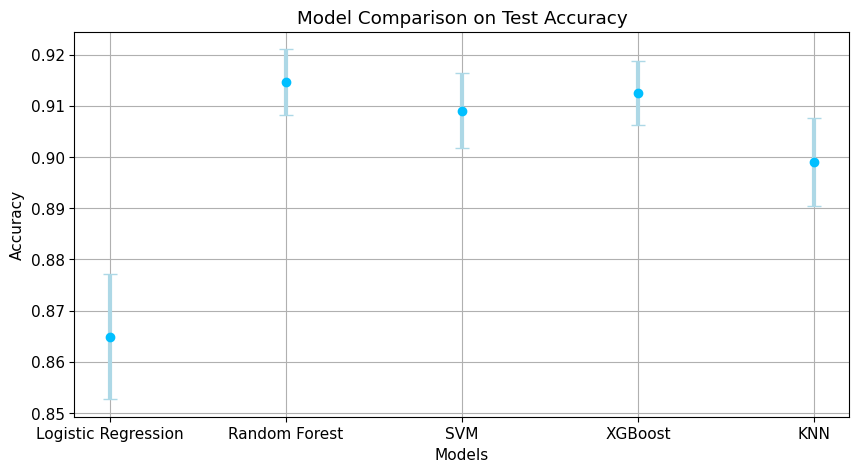

In [646]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost', 'KNN']
means = [np.mean(test_scores_lr), np.mean(test_scores_rf), np.mean(test_scores_svm), np.mean(test_scores_xgb), np.mean(test_scores_knn)]
stds = [np.std(test_scores_lr), np.std(test_scores_rf), np.std(test_scores_svm), np.std(test_scores_xgb), np.std(test_scores_knn)]

# Plotting
plt.figure(figsize=(10, 5))
plt.errorbar(models, means, yerr=stds, fmt='o', color='deepskyblue', ecolor='lightblue', elinewidth=3, capsize=5)
plt.title('Model Comparison on Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.grid(True)
plt.savefig("figures/model_comparison.png", dpi=300, bbox_inches="tight")
plt.show()


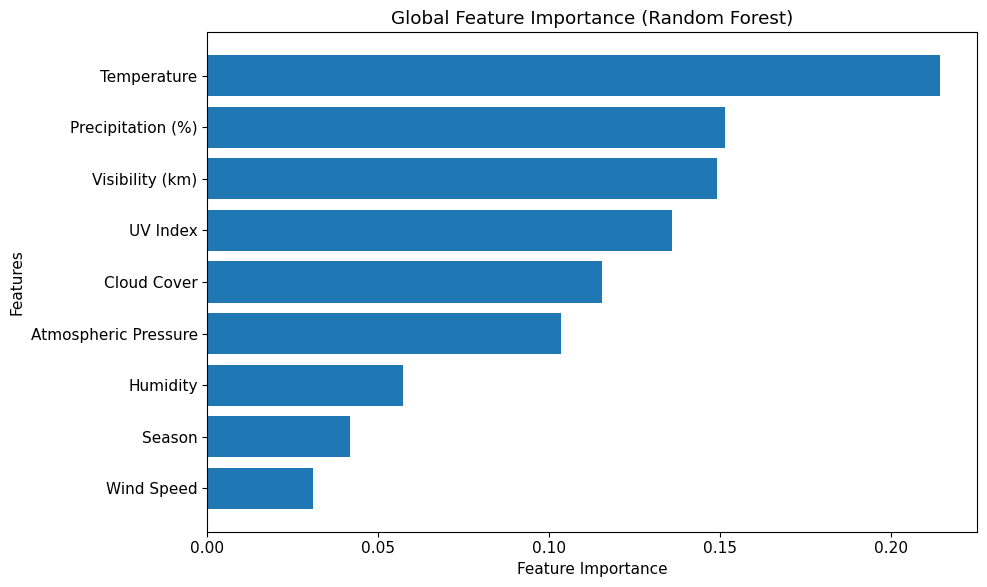

In [726]:
# Extract feature importances from the best Random Forest model
best_rf_model = best_models_rf[np.argmax(test_scores_rf)]  # Get the best RF model
feature_importances = best_rf_model.feature_importances_
feature_names = X_train_preprocessed_df.columns  # Get feature names from preprocessed data

# Sort and plot feature importances
import matplotlib.pyplot as plt
import numpy as np

sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Global Feature Importance (Random Forest)")
plt.tight_layout()
plt.savefig("figures/feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()


In [727]:
import shap

# Select the SHAP values for a specific class (e.g., class 1)
class_idx = 1  # Change this to the index of the class you want to inspect
shap_values_for_class = shap_values[:, :, class_idx]

explainer = shap.TreeExplainer(best_rf_model)
#best_X_rf_df = best_X_rf.to_numpy()
# Visualize SHAP values for one specific prediction (e.g., the first instance)
shap.initjs()
instance_idx = 0  # Change this to inspect other instances
shap.force_plot(
    explainer.expected_value[class_idx],  # Expected value for the class
    shap_values_for_class[instance_idx, :],  # SHAP values for the specific instance and class
    # best_X_rf_df[instance_idx, :],  # Features of the instance
    best_X_rf[instance_idx, :],
    feature_names=feature_names
)


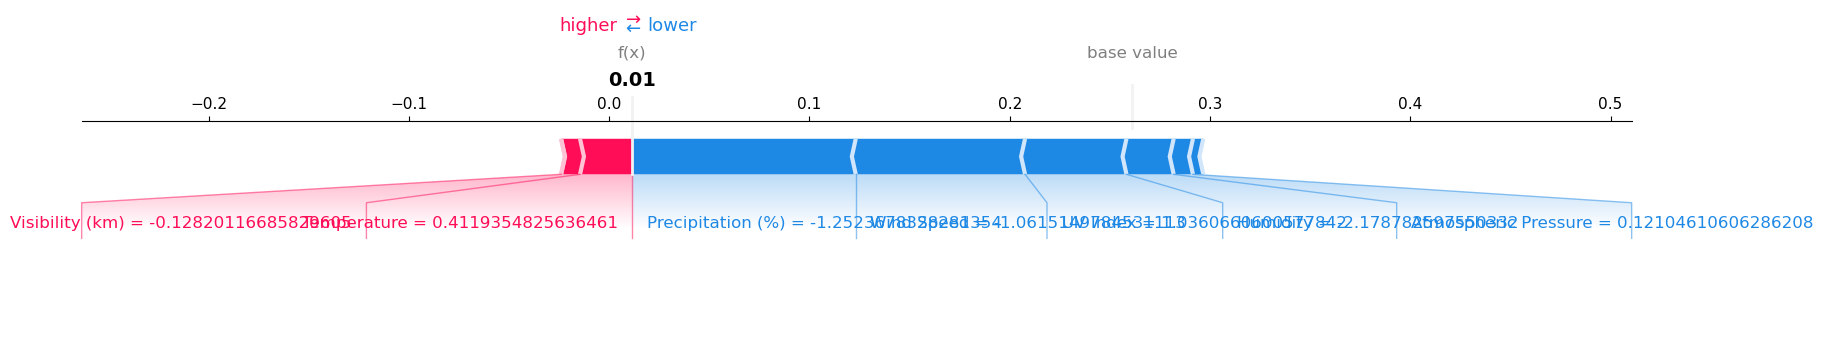

In [728]:
import matplotlib.pyplot as plt

# Convert SHAP values to matplotlib static plot

instance_idx = 10  # Choose the instance to visualize
shap.force_plot(
    explainer.expected_value[class_idx],
    shap_values_for_class[instance_idx, :],
    # best_X_rf_df[instance_idx, :],
    best_X_rf[instance_idx, :],
    feature_names=feature_names,
    matplotlib=True  # Use matplotlib for a static plot
)

# Save the plot with high resolution
#plt.savefig("figures/shap_force_plot1.png", dpi=300, bbox_inches="tight")
plt.show()


In [729]:
# Select the SHAP values for a specific class (e.g., class 1)
class_idx = 1  # Change this to the index of the class you want to inspect
shap_values_for_class = shap_values[:, :, class_idx]
# Visualize SHAP values for one specific prediction (e.g., the first instance)
shap.initjs()
instance_idx = 2  # Change this to inspect other instances
shap.force_plot(
    explainer.expected_value[class_idx],  # Expected value for the class
    shap_values_for_class[instance_idx, :],  # SHAP values for the specific instance and class
    # best_X_rf_df[instance_idx, :],  # Features of the instance
    best_X_rf[instance_idx, :],
    feature_names=feature_names
)

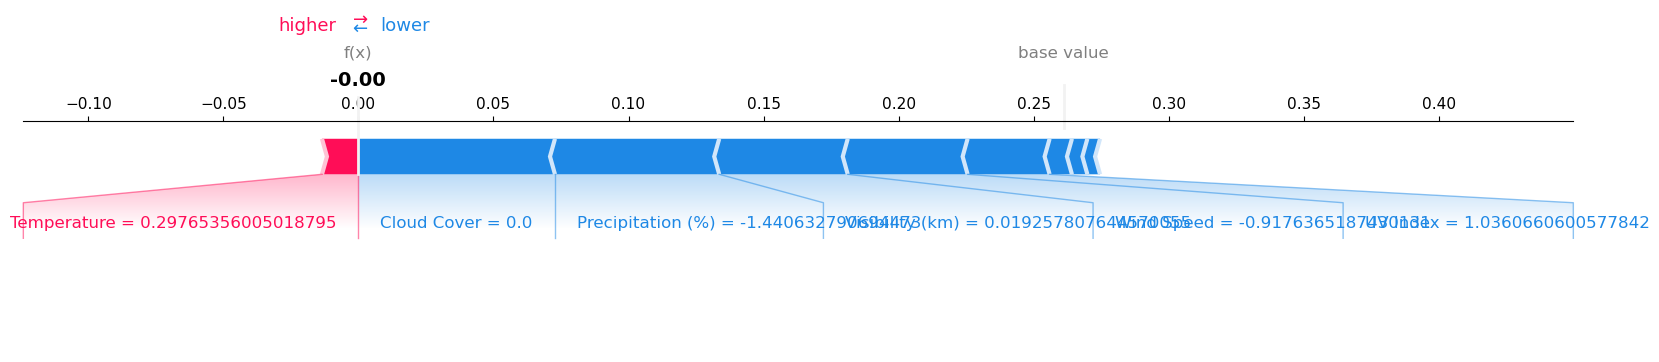

<Figure size 640x480 with 0 Axes>

In [730]:
import matplotlib.pyplot as plt

# Convert SHAP values to matplotlib static plot
instance_idx = 2  # Choose the instance to visualize
shap.force_plot(
    explainer.expected_value[class_idx],
    shap_values_for_class[instance_idx, :],
    # best_X_rf_df[instance_idx, :],
    best_X_rf[instance_idx, :],
    feature_names=feature_names,
    matplotlib=True  # Use matplotlib for a static plot
)

# Save the plot with high resolution
plt.savefig("figures/shap_force_plot2.png", dpi=300, bbox_inches="tight")
plt.show()


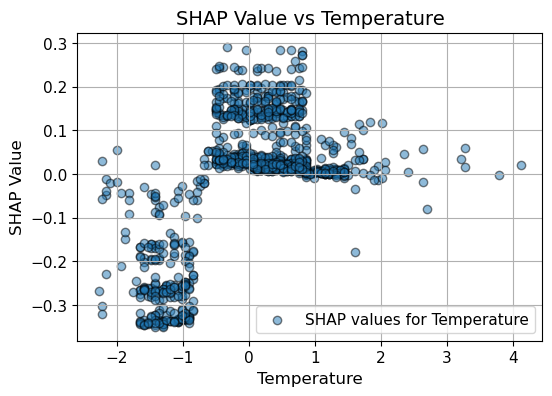

In [731]:
import matplotlib.pyplot as plt
import numpy as np

# Feature of interest
ftr = 'Temperature'  # Feature name
indx = np.argwhere(np.array(feature_names) == ftr)[0][0]  # Correct scalar index

# Plot SHAP values against feature values
plt.figure(figsize=(6, 4))
plt.scatter(
    # best_X_rf_df[:1000, indx],  # First 1000 samples of the selected feature
    best_X_rf[:1000, indx],
    shap_values[:1000, indx, 1],  # First 1000 SHAP values for class 1
    alpha=0.5,  # Transparency of points
    edgecolors='k',  # Point border color
    label=f'SHAP values for {ftr}'
)

# Add labels and title
plt.title(f"SHAP Value vs {ftr}", fontsize=14)
plt.xlabel(ftr, fontsize=12)
plt.ylabel('SHAP Value', fontsize=12)
plt.grid(True)
plt.legend(loc='best')
plt.savefig("figures/SHAP_vs_Temperature.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()



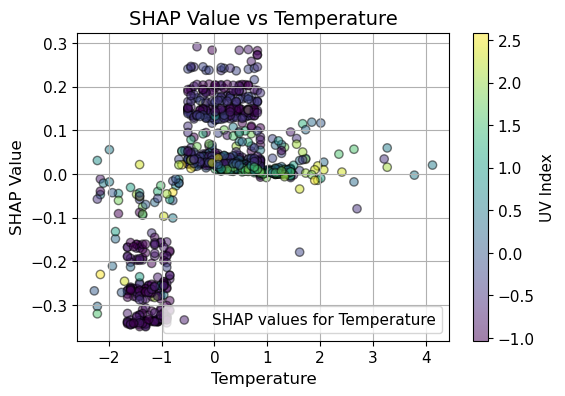

In [732]:
#Dependence plot
# Feature of interest
ftr1 = 'Temperature'  # Feature name
ftr2 = 'UV Index'  # Feature name
indx = np.argwhere(np.array(feature_names) == ftr)[0][0]  # Correct scalar index
indx2 = np.argwhere(np.array(feature_names) == ftr2)[0][0]  # Correct scalar

# Plot SHAP values against feature values
plt.figure(figsize=(6, 4))
plt.scatter(
    # best_X_rf_df[:1000, indx],  # First 1000 samples of the selected feature
    best_X_rf[:1000, indx],
    shap_values[:1000, indx, 1],  # First 1000 SHAP values for class 1
    c = best_X_rf[:1000, indx2], #color based on another feature
    alpha=0.5,  # Transparency of points
    edgecolors='k',  # Point border color
    label=f'SHAP values for {ftr}'
)

# Add labels and title
plt.title(f"SHAP Value vs {ftr}", fontsize=14)
plt.xlabel(ftr, fontsize=12)
plt.ylabel('SHAP Value', fontsize=12)
plt.colorbar(label=ftr2)
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig("figures/SHAP_vs_TemperatureAndUV.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()

In [481]:
# decoded_y_pred = label_encoder.inverse_transform(y_test_pred)
# Example: print decoded predictions
# print("Decoded Predictions:", decoded_y_pred)

In [482]:
import pandas as pd

# Define the data for the table
data = {
    "Algorithm": [
        "Logistic Regression",
        "Random Forest",
        "SVM",
        "XGBoost",
        "KNN"
    ],
    "Parameters": [
        "C = [0.01, 0.1, 1, 10, 100]\npenalty = ['l2']\nsolver = ['lbfgs', 'sag', 'newton-cg']",
        "max_depth = [5, 10, None]\nmax_features = ['sqrt', 'log2', None]\nmin_samples_split = [2, 5, 10]",
        "C = [0.01, 0.1, 1, 10]\ngamma = [0.001, 0.01, 0.1, 1, 10, 100]\nkernel = ['rbf', 'sigmoid']",
        "eta = [0.01, 0.1, 0.3]\nreg_lambda = [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2]\nmax_depth = [3, 6, 9]",
        "n_neighbors = [3, 5, 7, 10]\nweights = ['uniform', 'distance']\nmetric = ['euclidean', 'manhattan', 'minkowski']"
    ]
}

# Create the DataFrame
table_df = pd.DataFrame(data)

# Display the table
print(table_df)

# Export to a CSV file if needed
table_df.to_csv("algorithms_and_parameters.csv", index=False)


             Algorithm                                         Parameters
0  Logistic Regression  C = [0.01, 0.1, 1, 10, 100]\npenalty = ['l2']\...
1        Random Forest  max_depth = [5, 10, None]\nmax_features = ['sq...
2                  SVM  C = [0.01, 0.1, 1, 10]\ngamma = [0.001, 0.01, ...
3              XGBoost  eta = [0.01, 0.1, 0.3]\nreg_lambda = [0e0, 1e-...
4                  KNN  n_neighbors = [3, 5, 7, 10]\nweights = ['unifo...


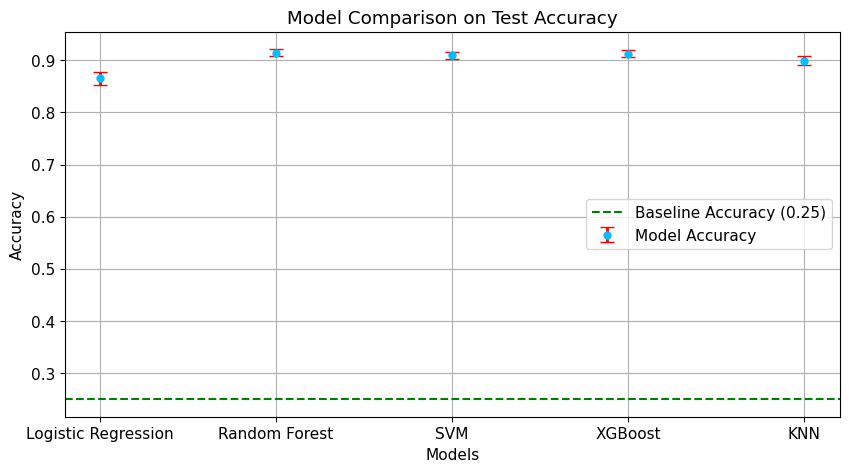

In [661]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost', 'KNN']
means = [np.mean(test_scores_lr), np.mean(test_scores_rf), np.mean(test_scores_svm), np.mean(test_scores_xgb), np.mean(test_scores_knn)]
stds = [np.std(test_scores_lr), np.std(test_scores_rf), np.std(test_scores_svm), np.std(test_scores_xgb), np.std(test_scores_knn)]
base_accuracy = 0.25  # Baseline accuracy

# Plotting
plt.figure(figsize=(10, 5))
plt.errorbar(
    models, means, yerr=stds, fmt='o', 
    color='deepskyblue', ecolor='red', elinewidth=2, capsize=5, 
    markersize=5, label='Model Accuracy'
)
plt.axhline(y=base_accuracy, color='green', linestyle='--', label='Baseline Accuracy (0.25)')
plt.title('Model Comparison on Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.legend(loc='best')
plt.grid(True)

# Save the plot
plt.savefig("figures/model_comparison_with_red_std_green_baseline.png", dpi=300, bbox_inches="tight")
plt.show()


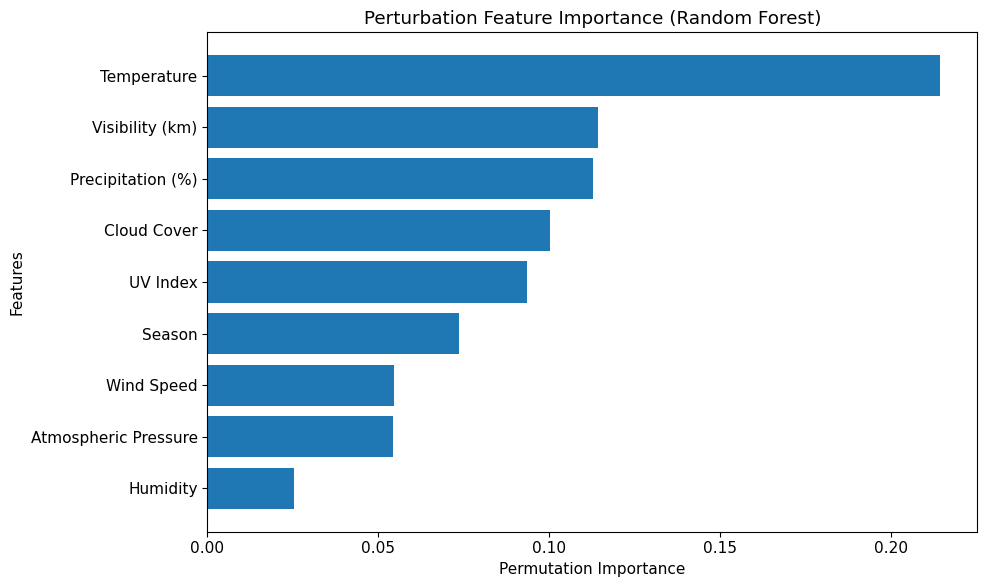

In [733]:
# your code here
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

perm_importance = permutation_importance(
    best_rf_model, best_X_rf, best_y_rf, n_repeats=5, random_state=42, scoring='accuracy'
)

# Extract and sort importance values
sorted_idx = perm_importance.importances_mean.argsort()[:]

plt.figure(figsize=(10, 6))
plt.barh(
    np.array(feature_names)[sorted_idx],
    perm_importance.importances_mean[sorted_idx]
)
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Perturbation Feature Importance (Random Forest)")
plt.tight_layout()
plt.savefig("figures/perturbation_importance.png", dpi=300, bbox_inches="tight")
plt.show()


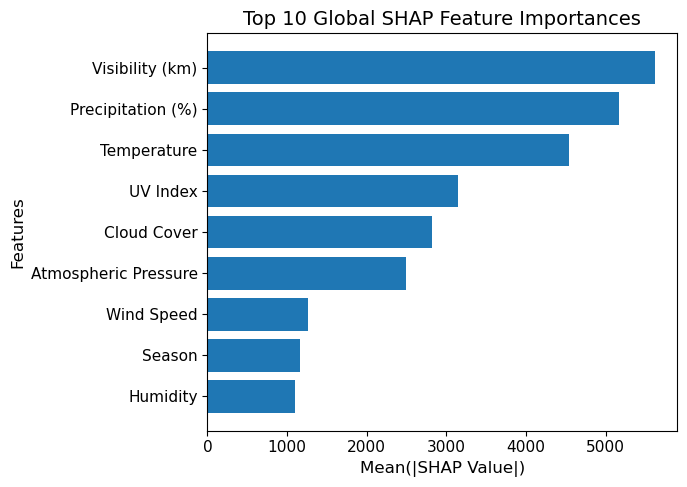

In [734]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assuming best_rf_model, best_X_rf, and feature_names are defined
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(best_X_rf)  # SHAP values for all classes
# Combine SHAP values across all classes to get global feature importance
shap_summary = np.sum(np.abs(shap_values[:, :, 1]), axis=0) + np.sum(np.abs(shap_values[:, :, 0]), axis=0)  
indcs = np.argsort(shap_summary)  # Indices of features sorted by importance
# Plot the top 10 features
plt.figure(figsize=(7, 5))  # Adjust size as needed
plt.barh(np.array(feature_names)[indcs[-10:]], shap_summary[indcs[-10:]])
plt.xlabel("Mean(|SHAP Value|)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Top 10 Global SHAP Feature Importances", fontsize=14)
plt.tight_layout()
plt.savefig("figures/top_10_global_shap_importance.png", dpi=300, bbox_inches="tight")
plt.show()


In [736]:
# Save models
import os
from joblib import dump
best_rf_model = best_models_rf[np.argmax(test_scores_rf)]
path = "results/"
filename = "best_model.joblib"
# Save the best model
model_path = os.path.join(path, filename)
dump(best_rf_model, model_path)
print(f"Model saved to {model_path}")

best_lr_model = best_models_lr[np.argmax(test_scores_lr)]
path = "results/"
filename = "best_model_lr.joblib"
# Save the best model
model_path = os.path.join(path, filename)
dump(best_lr_model, model_path)
print(f"Model saved to {model_path}")

best_xgb_model = best_models_xgb[np.argmax(test_scores_xgb)]
path = "results/"
filename = "best_model_xgb.joblib"
# Save the best model
model_path = os.path.join(path, filename)
dump(best_xgb_model, model_path)
print(f"Model saved to {model_path}")

best_svm_model = best_models_svm[np.argmax(test_scores_svm)]
path = "results/"
filename = "best_model_svm.joblib"
# Save the best model
model_path = os.path.join(path, filename)
dump(best_svm_model, model_path)
print(f"Model saved to {model_path}")

best_knn_model = best_models_knn[np.argmax(test_scores_knn)]
path = "results/"
filename = "best_model_knn.joblib"
# Save the best model
model_path = os.path.join(path, filename)
dump(best_knn_model, model_path)
print(f"Model saved to {model_path}")


Model saved to results/best_model.joblib
Model saved to results/best_model_lr.joblib
Model saved to results/best_model_xgb.joblib
Model saved to results/best_model_svm.joblib
Model saved to results/best_model_knn.joblib


In [ ]:
import os
import pandas as pd

# Ensure the results folder exists
results_folder = "results/"
os.makedirs(results_folder, exist_ok=True)

# Make predictions using the best model
y_test_pred = best_rf_model.predict(best_X_rf)

feature_names = X_train_preprocessed_df.columns
results_df = pd.DataFrame({
    "Actual": best_y_rf,
    "Predicted": y_test_pred
})

# Add test features to the results
results_df = pd.concat([results_df, pd.DataFrame(best_X_rf, columns=feature_names)], axis=1)

# Save the results to a CSV file
results_file = os.path.join(results_folder, "test_results.csv")
results_df.to_csv(results_file, index=False)
print(f"Results saved to {results_file}")

Results saved to results/test_results.csv


In [744]:
import pandas as pd
# Create the data folder if it doesn't exist
data_folder = "data/"
os.makedirs(data_folder, exist_ok=True)

feature_names = X_train_preprocessed_df.columns
X_df = pd.DataFrame(best_X_rf, columns=feature_names)

# Convert y to a DataFrame
y_df = pd.DataFrame(best_y_rf, columns=["Weather Type"])

# Save X and y as separate CSV files
X_file = os.path.join(data_folder, "preprocessed_X.csv")
y_file = os.path.join(data_folder, "preprocessed_y.csv")

X_df.to_csv(X_file, index=False)
y_df.to_csv(y_file, index=False)

print(f"Preprocessed X saved to {X_file}")
print(f"Preprocessed y saved to {y_file}")


Preprocessed X saved to data/preprocessed_X.csv
Preprocessed y saved to data/preprocessed_y.csv


In [747]:
feature_names = X_train_preprocessed_df.columns
X_df = pd.DataFrame(best_X_lr, columns=feature_names)
# Convert y to a DataFrame
y_df = pd.DataFrame(best_y_lr, columns=["Weather Type"])
# Save X and y as separate CSV files
X_file = os.path.join(data_folder, "preprocessed_X_lr.csv")
y_file = os.path.join(data_folder, "preprocessed_y_lr.csv")
X_df.to_csv(X_file, index=False)
y_df.to_csv(y_file, index=False)
print(f"Preprocessed X saved to {X_file}")
print(f"Preprocessed y saved to {y_file}")

feature_names = X_train_preprocessed_df.columns
X_df = pd.DataFrame(best_X_xgb, columns=feature_names)
# Convert y to a DataFrame
y_df = pd.DataFrame(best_y_xgb, columns=["Weather Type"])
# Save X and y as separate CSV files
X_file = os.path.join(data_folder, "preprocessed_X_xgb.csv")
y_file = os.path.join(data_folder, "preprocessed_y_xgb.csv")
X_df.to_csv(X_file, index=False)
y_df.to_csv(y_file, index=False)
print(f"Preprocessed X saved to {X_file}")
print(f"Preprocessed y saved to {y_file}")

feature_names = X_train_preprocessed_df.columns
X_df = pd.DataFrame(best_X_knn, columns=feature_names)
# Convert y to a DataFrame
y_df = pd.DataFrame(best_y_knn, columns=["Weather Type"])
# Save X and y as separate CSV files
X_file = os.path.join(data_folder, "preprocessed_X_knn.csv")
y_file = os.path.join(data_folder, "preprocessed_y_knn.csv")
X_df.to_csv(X_file, index=False)
y_df.to_csv(y_file, index=False)
print(f"Preprocessed X saved to {X_file}")
print(f"Preprocessed y saved to {y_file}")

feature_names = X_train_preprocessed_df.columns
X_df = pd.DataFrame(best_X_svm, columns=feature_names)
# Convert y to a DataFrame
y_df = pd.DataFrame(best_y_svc, columns=["Weather Type"])
# Save X and y as separate CSV files
X_file = os.path.join(data_folder, "preprocessed_X_svm.csv")
y_file = os.path.join(data_folder, "preprocessed_y_svm.csv")
X_df.to_csv(X_file, index=False)
y_df.to_csv(y_file, index=False)
print(f"Preprocessed X saved to {X_file}")
print(f"Preprocessed y saved to {y_file}")

Preprocessed X saved to data/preprocessed_X_lr.csv
Preprocessed y saved to data/preprocessed_y_lr.csv
Preprocessed X saved to data/preprocessed_X_xgb.csv
Preprocessed y saved to data/preprocessed_y_xgb.csv
Preprocessed X saved to data/preprocessed_X_knn.csv
Preprocessed y saved to data/preprocessed_y_knn.csv
Preprocessed X saved to data/preprocessed_X_svm.csv
Preprocessed y saved to data/preprocessed_y_svm.csv
